In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import seaborn as ss
import matplotlib.pyplot as plt

import warnings as warn
warn.filterwarnings('ignore')

In [2]:
#Importing the dataset
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(data.shape)

#infomation about dataset
data.info()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [4]:
# Checking the range and statistical information of dataset
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Check for the null values cunts
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
#data[(data.PoolQC.isnull()) & (data.PoolArea > 0)].head() ------- Checking for odd data values if any
data.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [7]:
#By looking at the info stats, we can see some of the variables are having almost 80-97 percent of null values.
# Dropping the varibale having high percentage of null values. Even though we impute the Null with some value it wont play a vital role in model building.
data.drop(['Id','PoolQC','Fence','MiscFeature','Alley', 'LotFrontage'], axis=1, inplace=True)

In [8]:
#Missing value treatment
#Filling with NA as per data definition
data.FireplaceQu.fillna('NA', inplace=True)

In [9]:
#Filling Basement related variables with 'NA' as per data definition.
data.BsmtQual.fillna('NA', inplace=True)
data.BsmtCond.fillna('NA', inplace=True)
data.BsmtFinType1.fillna('NA', inplace=True)
data.BsmtFinType2.fillna('NA', inplace=True)
data.BsmtExposure.fillna('NA', inplace=True)

In [10]:
# Filling Garage related variables with 'NA' as per data definition
data.GarageQual.fillna('NA', inplace=True)
data.GarageCond.fillna('NA', inplace=True)
data.GarageYrBlt.fillna(0, inplace=True)
data.GarageType.fillna('NA', inplace=True)
data.GarageFinish.fillna('NA', inplace=True)

In [11]:
# Filling None & 0 as per data definition for the missing values
data.MasVnrType.fillna('None', inplace=True)
data.MasVnrArea.fillna(0, inplace=True)
data.Electrical.fillna('NA', inplace=True)

In [12]:
# Lets again check for Null values count
print(data.shape)
data.isnull().sum()

(1460, 75)


MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

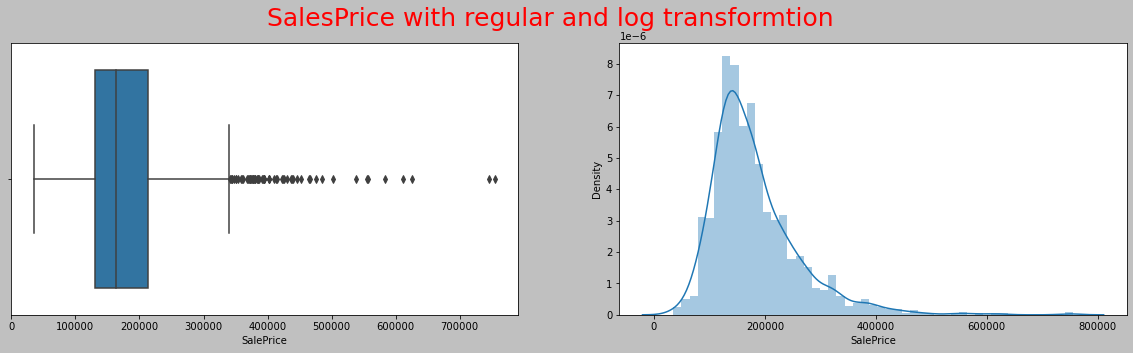

In [156]:
# Checking on the target variable first, we could see a little bit difference towards the high price while keeping the as it is.
# where as if we take the log transformation for the same the values seems pretty normal
plt.figure(figsize=(20,5), facecolor='silver')
plt.suptitle("SalesPrice with regular and log transformtion", fontsize=25, color='r',fontweight=20)

plt.subplot(1,2,1)
ss.boxplot(data.SalePrice)

plt.subplot(1,2,2)
ss.distplot(data.SalePrice)


plt.show()

In [148]:
#Outlier removal towards the end
housing_data = data[data.SalePrice <= data.SalePrice.quantile(0.95)]

In [149]:
housing_data.SalePrice.describe()

count      1387.000000
mean     168807.803172
std       57446.595410
min       34900.000000
25%      128700.000000
50%      159000.000000
75%      201000.000000
max      326000.000000
Name: SalePrice, dtype: float64

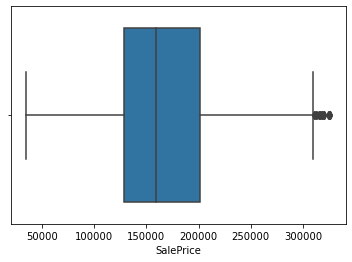

In [145]:
#Post outlier removal the boxplot looks pretty decent
ss.boxplot(housing_data.SalePrice)
plt.show()

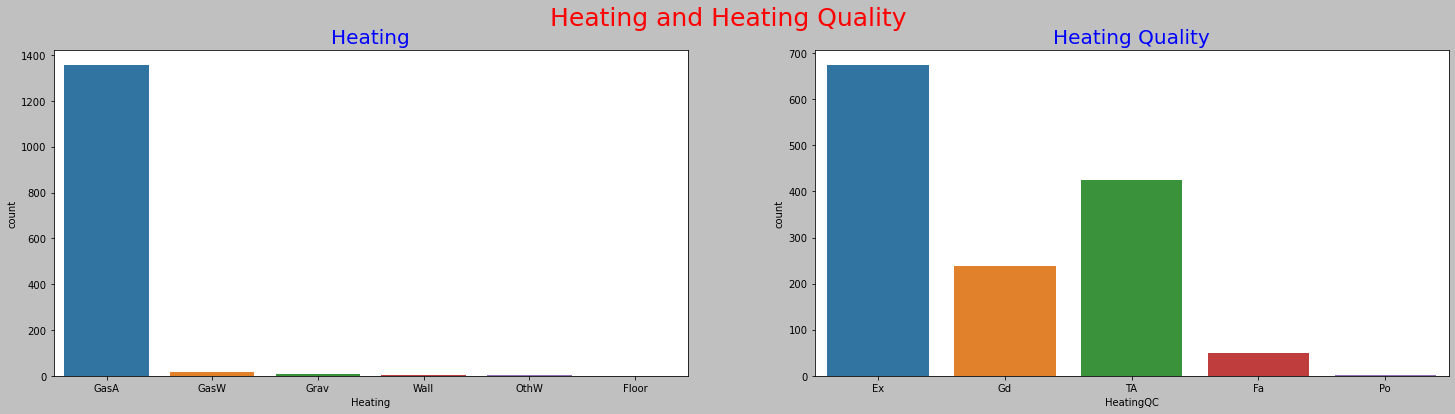

In [155]:
#Univariate Analysis
#GasA category is touching skies as compared to other category whereas on the otherhand people obviously prefer Excellent quality
#heating system in the house but one thing to observe over here is the spike is down in "Good" category and spike is more in the 
# "Average" than "Good". so one reason could be the quality of Average would be closer to Good or it could be budget issue. 
fig, ax = plt.subplots(1,2, figsize=(25,6), facecolor='silver')
plt.suptitle("Heating and Heating Quality", fontsize=25, color='r',fontweight=20)

#Setting title of every axes
ax[0].set_title("Heating", color='b', fontsize=20)
ax[1].set_title("Heating Quality", color='b', fontsize=20)

#Plotting data for each subplot
ss.countplot(ax=ax[0], x=housing_data.Heating)
ss.countplot(ax=ax[1], x=housing_data.HeatingQC)

plt.show()

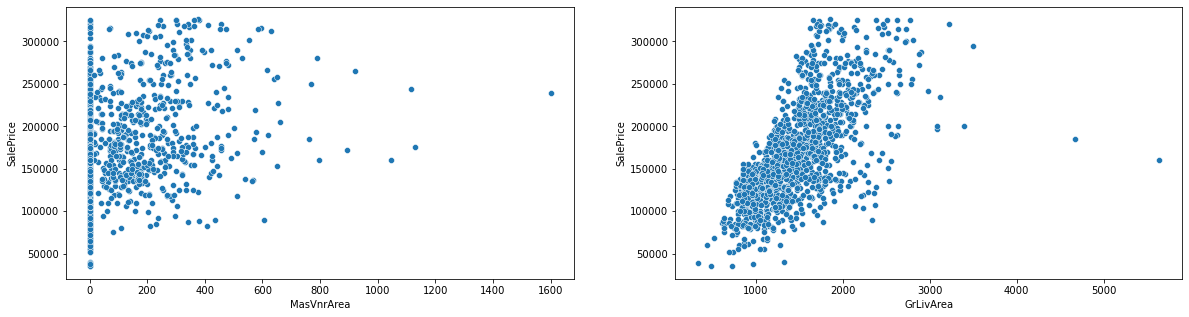

In [17]:
#We could see a linear trend between Living area and Sales price, where as on the veneery data points are scattered.
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ss.scatterplot(x=housing_data.MasVnrArea, y=housing_data.SalePrice)

plt.subplot(1,2,2)
ss.scatterplot(x=housing_data.GrLivArea, y=housing_data.SalePrice)

plt.show()


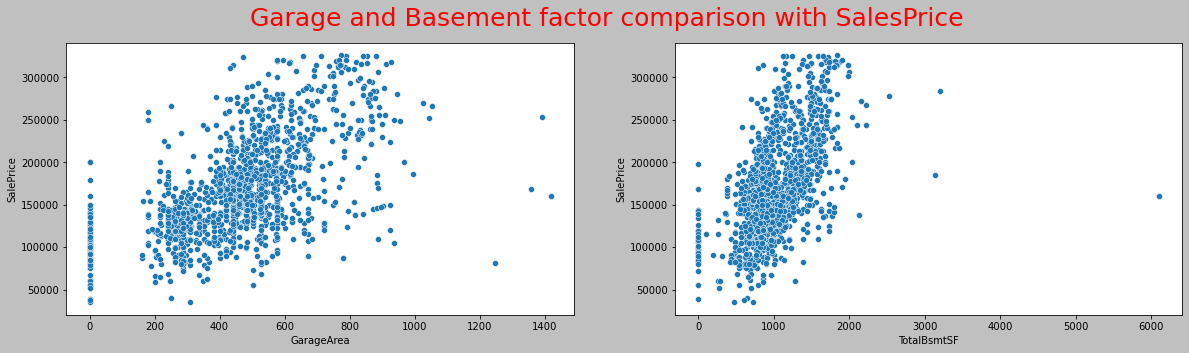

In [18]:
#Below pic gives us a fair idea about as the area of Garage and Basement increase the price is also increasing.
# More People prefer property with Garage than no Garage
# Just like Garage, people prefer basement too and right pic show the positive correlation too.
plt.figure(figsize=(20,5), facecolor='silver')
plt.suptitle("Garage and Basement factor comparison with SalesPrice", fontsize=25, color='r',fontweight=20)

plt.subplot(1,2,1)
ss.scatterplot(x=housing_data.GarageArea, y=housing_data.SalePrice)

plt.subplot(1,2,2)
ss.scatterplot(x=housing_data.TotalBsmtSF, y=housing_data.SalePrice)

plt.show()

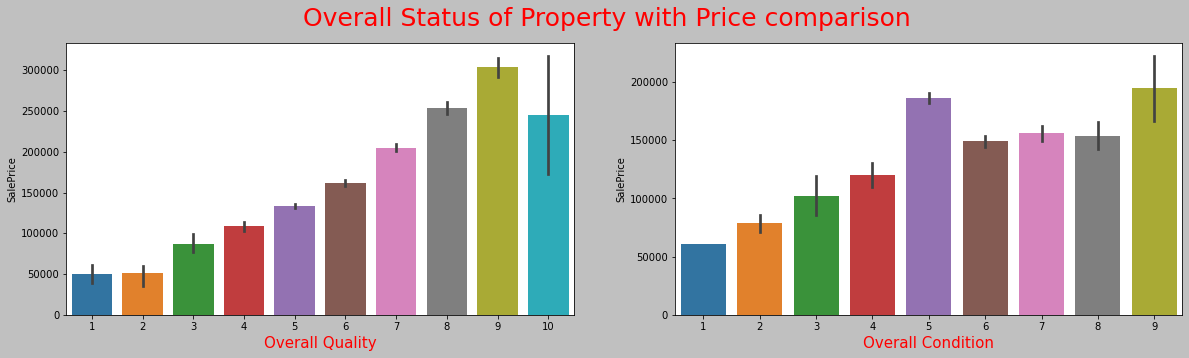

In [19]:
# We ould see the Saleprice is getting increase the the Quality increases on the otherside the values are going up for the 
# medium based people like the Poor,Average and the Excellent buys 
plt.figure(figsize=(20,5), facecolor='silver')
plt.suptitle("Overall Status of Property with Price comparison", fontsize=25, color='r',fontweight=20)


plt.subplot(1,2,1)
ss.barplot(data = housing_data, x = housing_data.OverallQual, y = housing_data.SalePrice)
plt.xlabel("Overall Quality",color='r', fontsize=15)

plt.subplot(1,2,2)
ss.barplot(data = housing_data, x = housing_data.OverallCond, y = housing_data.SalePrice)
plt.xlabel("Overall Condition", color='r', fontsize=15)

plt.show()

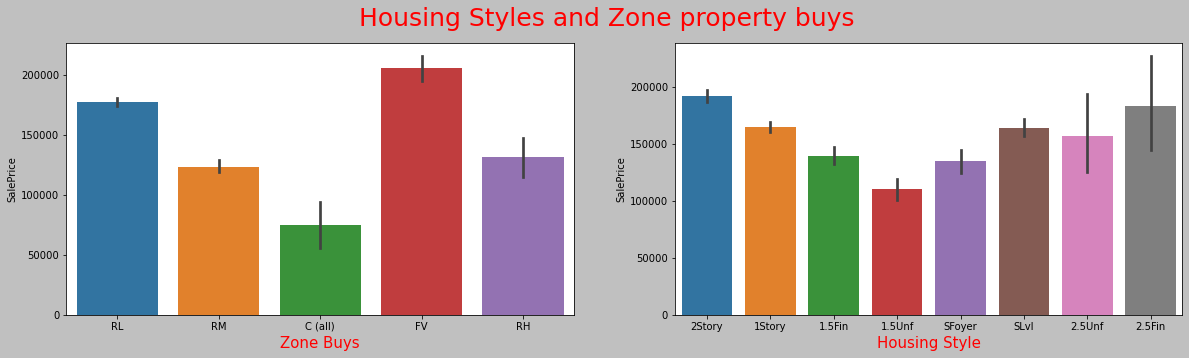

In [20]:
# We could see the Residental Low Dentsity and the Floating village are havong more price as compared to other.
# Probably people prefer the less area for the house considering less number of people would be ther in family. And for the 
# FV housing, it could probably they rarely found such buys so the prices are higher.
plt.figure(figsize=(20,5), facecolor='silver')
plt.suptitle("Housing Styles and Zone property buys", fontsize=25, color='r',fontweight=20)


plt.subplot(1,2,1)
ss.barplot(data = housing_data, x = housing_data.MSZoning, y = housing_data.SalePrice)
plt.xlabel("Zone Buys",color='r', fontsize=15)

plt.subplot(1,2,2)
ss.barplot(data = housing_data, x = housing_data.HouseStyle, y = housing_data.SalePrice)
plt.xlabel("Housing Style", color='r', fontsize=15)

plt.show()

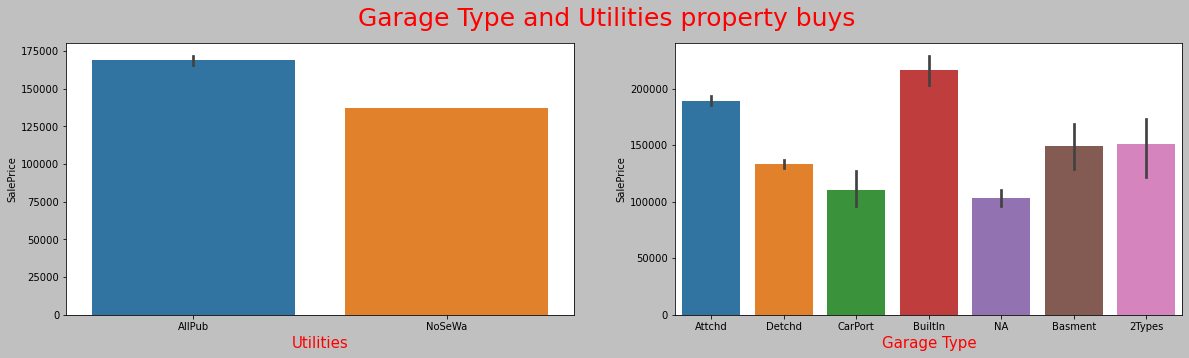

In [21]:
# As people tends to think the utilities available near by house while buying the same. The more the utilities, more the price.
# Shown in the left graph, where there are more Piblic Utilites more the sales price is compared to only normal utlities are 
# there like electricity and gas.
# Along with that, built in garage  price are higher keeping in mind the facility and the convinience people get, so price are higher
# for buitin ones where as having only carport are cheaper

plt.figure(figsize=(20,5), facecolor='silver')
plt.suptitle("Garage Type and Utilities property buys", fontsize=25, color='r',fontweight=20)


plt.subplot(1,2,1)
ss.barplot(data = housing_data, x = housing_data.Utilities, y = housing_data.SalePrice)
plt.xlabel("Utilities",color='r', fontsize=15)

plt.subplot(1,2,2)
ss.barplot(data = housing_data, x = housing_data.GarageType, y = housing_data.SalePrice)
plt.xlabel("Garage Type", color='r', fontsize=15)

plt.show()

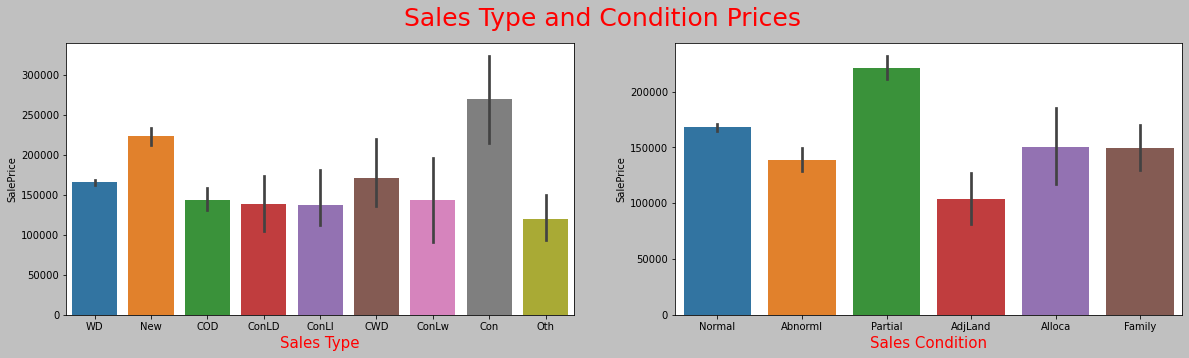

In [22]:
# We could see the Partial is more expensive than the other categories as the people tends to buy a new house by taking a look 
#at the plan, structure and other factor, which makes them excited and havinmg a nostalgia of how the house will look once completed
#Where as on the otherhand, AdjLand purchase has less expensive of all other category

# On the other hand we have Sale Type varibales which shows most folks prefer to do the down payment and go for the house. Which inturn increases the salePrice too.
# Apart from the payment, we can see the house which just constructed having higher price considering the new house will have more
#good facikities and less trouble n loss.
plt.figure(figsize=(20,5), facecolor='silver')
plt.suptitle("Sales Type and Condition Prices ", fontsize=25, color='r',fontweight=20)


plt.subplot(1,2,1)
ss.barplot(data = housing_data, x = housing_data.SaleType, y = housing_data.SalePrice)
plt.xlabel("Sales Type",color='r', fontsize=15)

plt.subplot(1,2,2)
ss.barplot(data = housing_data, x = housing_data.SaleCondition, y = housing_data.SalePrice)
plt.xlabel("Sales Condition", color='r', fontsize=15)

plt.show()

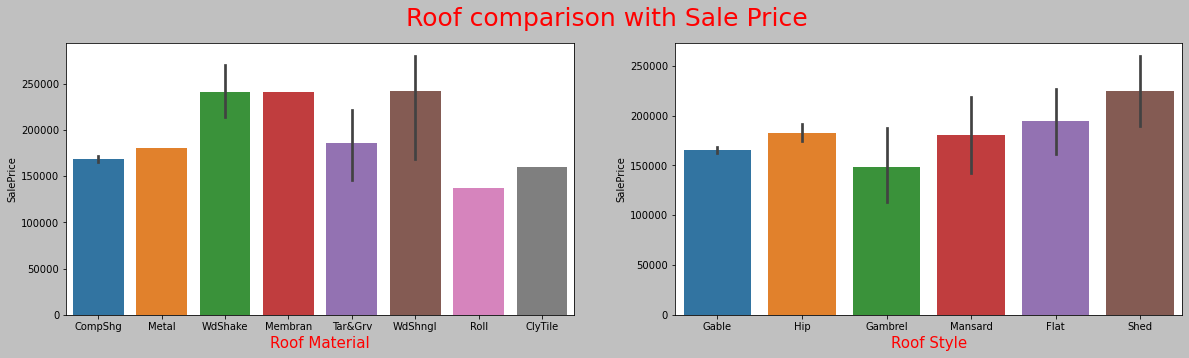

In [158]:
#We could see the SalePrice for Wood Shakes, Membrane and Wood Shingles are almostr similar and high of all the other category.
#Considering the roof style like the above definitely looks attractuve but require much work to do, additional cost of fitting could be
# material cost. where as Roll and Clay/Tile has less expensive and also easy task to do compared to other sty;es.

plt.figure(figsize=(20,5), facecolor='silver')
plt.suptitle("Roof comparison with Sale Price", fontsize=25, color='r',fontweight=20)


plt.subplot(1,2,1)
ss.barplot(data = housing_data, x = housing_data.RoofMatl, y = housing_data.SalePrice)
plt.xlabel("Roof Material",color='r', fontsize=15)

plt.subplot(1,2,2)
ss.barplot(data = housing_data, x = housing_data.RoofStyle, y = housing_data.SalePrice)
plt.xlabel("Roof Style", color='r', fontsize=15)

plt.show()

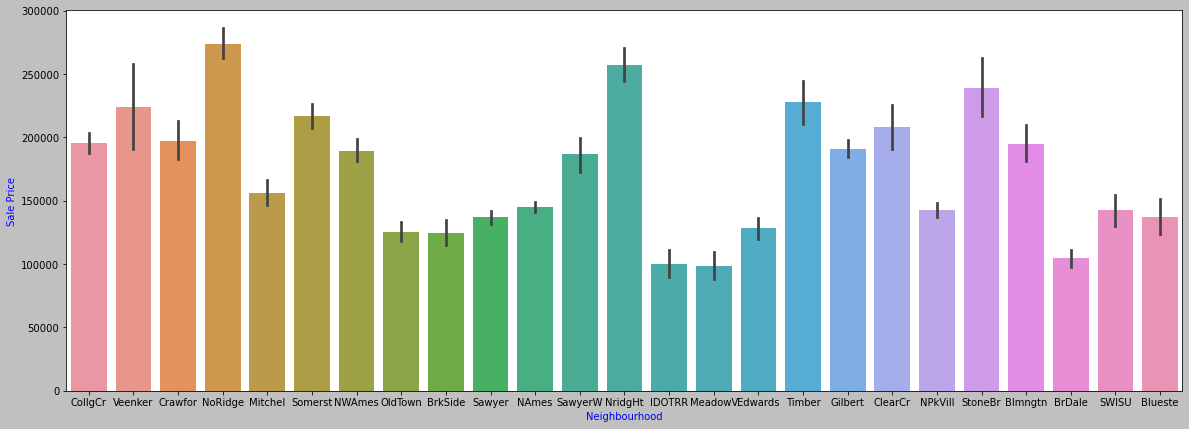

In [162]:
#We could clearly see the highest values for the Neighbourhood is Northridge, Northridge height assuming it the crowded area and t
#the more residential ones so the SalePrice for such area will be higher.
#There could also be probabilities the surrounding of the area. Like the college creek is like a weekend place so the property out there
# will have a high SalePrice.
#Whereas the category IDOTRR and Meadow has the lowest price considering the house near by rail and long from the facilities or city 
#has its own disadvantage.

plt.figure(facecolor='silver', figsize=(20,7))
ss.barplot(data=housing_data, x=housing_data.Neighborhood, y=housing_data.SalePrice)
plt.xlabel("Neighbourhood",color='b', fontsize=10)
plt.ylabel("Sale Price",color='b', fontsize=10)
plt.show()

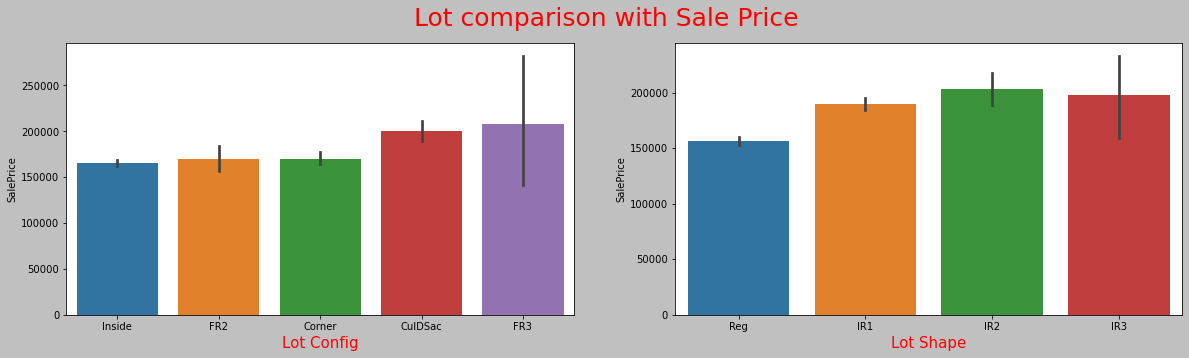

In [166]:
#The SalePrice for Frotage 3 side of the property has higher consider three fronts provided along with that the Cul-de-sc has the 
# second highest Sales Price considering the neighbourhood and the atmosphere near by.
# Where as the Inside lot has the lowest SalePrice of all.
plt.figure(figsize=(20,5), facecolor='silver')
plt.suptitle("Lot comparison with Sale Price", fontsize=25, color='r',fontweight=20)


plt.subplot(1,2,1)
ss.barplot(data = housing_data, x = housing_data.LotConfig, y = housing_data.SalePrice)
plt.xlabel("Lot Config",color='r', fontsize=15)

plt.subplot(1,2,2)
ss.barplot(data = housing_data, x = housing_data.LotShape, y = housing_data.SalePrice)
plt.xlabel("Lot Shape", color='r', fontsize=15)

plt.show()

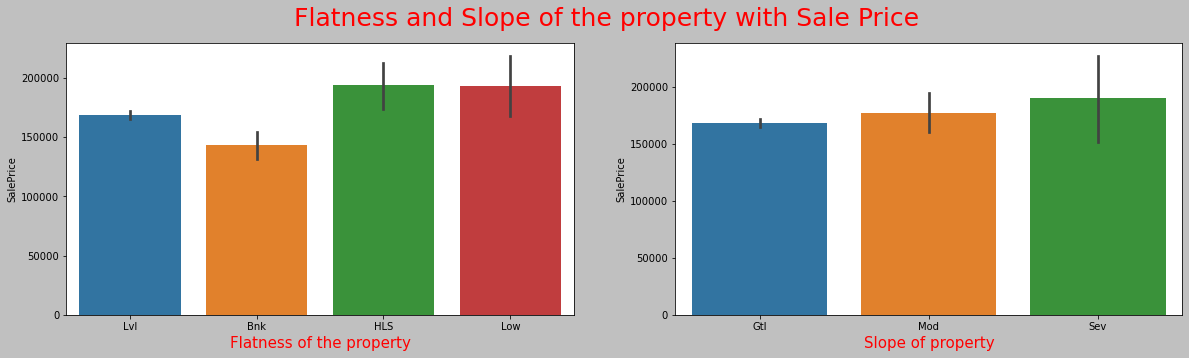

In [168]:
# The Hillside and the depression kind of flatness has almost same SalePrice considering people prefer to have a weekend house 
# in the slient place and far from city noises 
#Where as the slope of the property, severe slope houses are the expensive ones considering the effort, design and robustness it gives.
# Severe slope property also looks sorted, organized and attractive too.
plt.figure(figsize=(20,5), facecolor='silver')
plt.suptitle("Flatness and Slope of the property with Sale Price", fontsize=25, color='r',fontweight=20)


plt.subplot(1,2,1)
ss.barplot(data = housing_data, x = housing_data.LandContour, y = housing_data.SalePrice)
plt.xlabel("Flatness of the property",color='r', fontsize=15)

plt.subplot(1,2,2)
ss.barplot(data = housing_data, x = housing_data.LandSlope, y = housing_data.SalePrice)
plt.xlabel("Slope of property", color='r', fontsize=15)

plt.show()

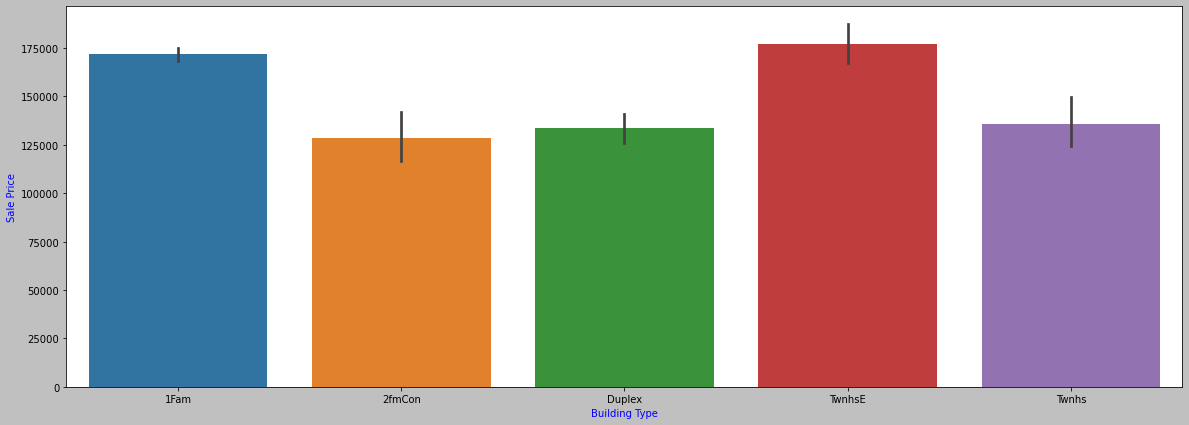

In [171]:
#We could clearly see Single Family detached and the Townhouse end unit are alomost has the similar SalePrice. Consodering the 
# most of the people moves to the new house once they get married or try to live their life on their own.
plt.figure(facecolor='silver', figsize=(20,7))
ss.barplot(data=housing_data, x=housing_data.BldgType, y=housing_data.SalePrice)
plt.xlabel("Building Type",color='b', fontsize=10)
plt.ylabel("Sale Price",color='b', fontsize=10)
plt.show()

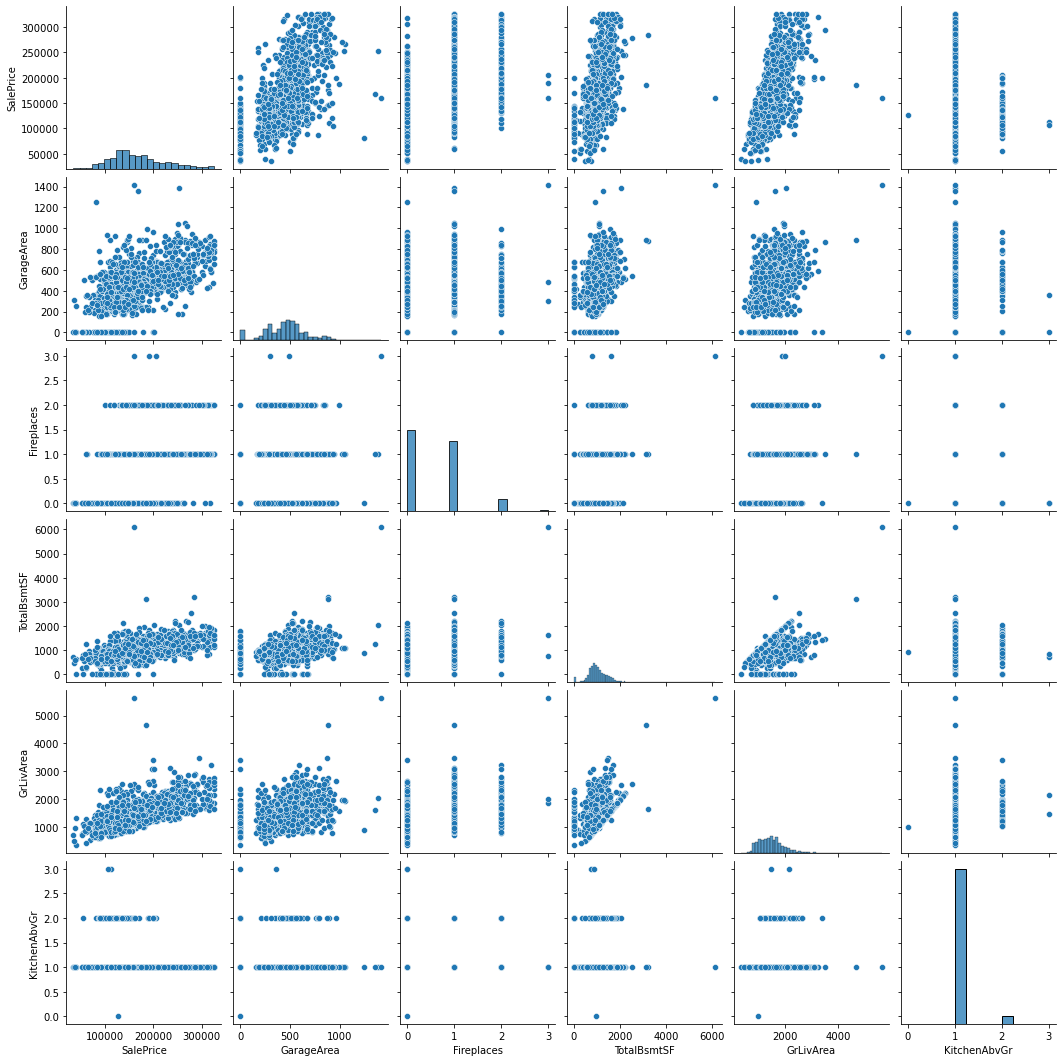

In [23]:
# Multivariate Analysis
ss.pairplot(housing_data[["SalePrice", "GarageArea", "Fireplaces", "TotalBsmtSF", "GrLivArea", "KitchenAbvGr"]])
plt.show()

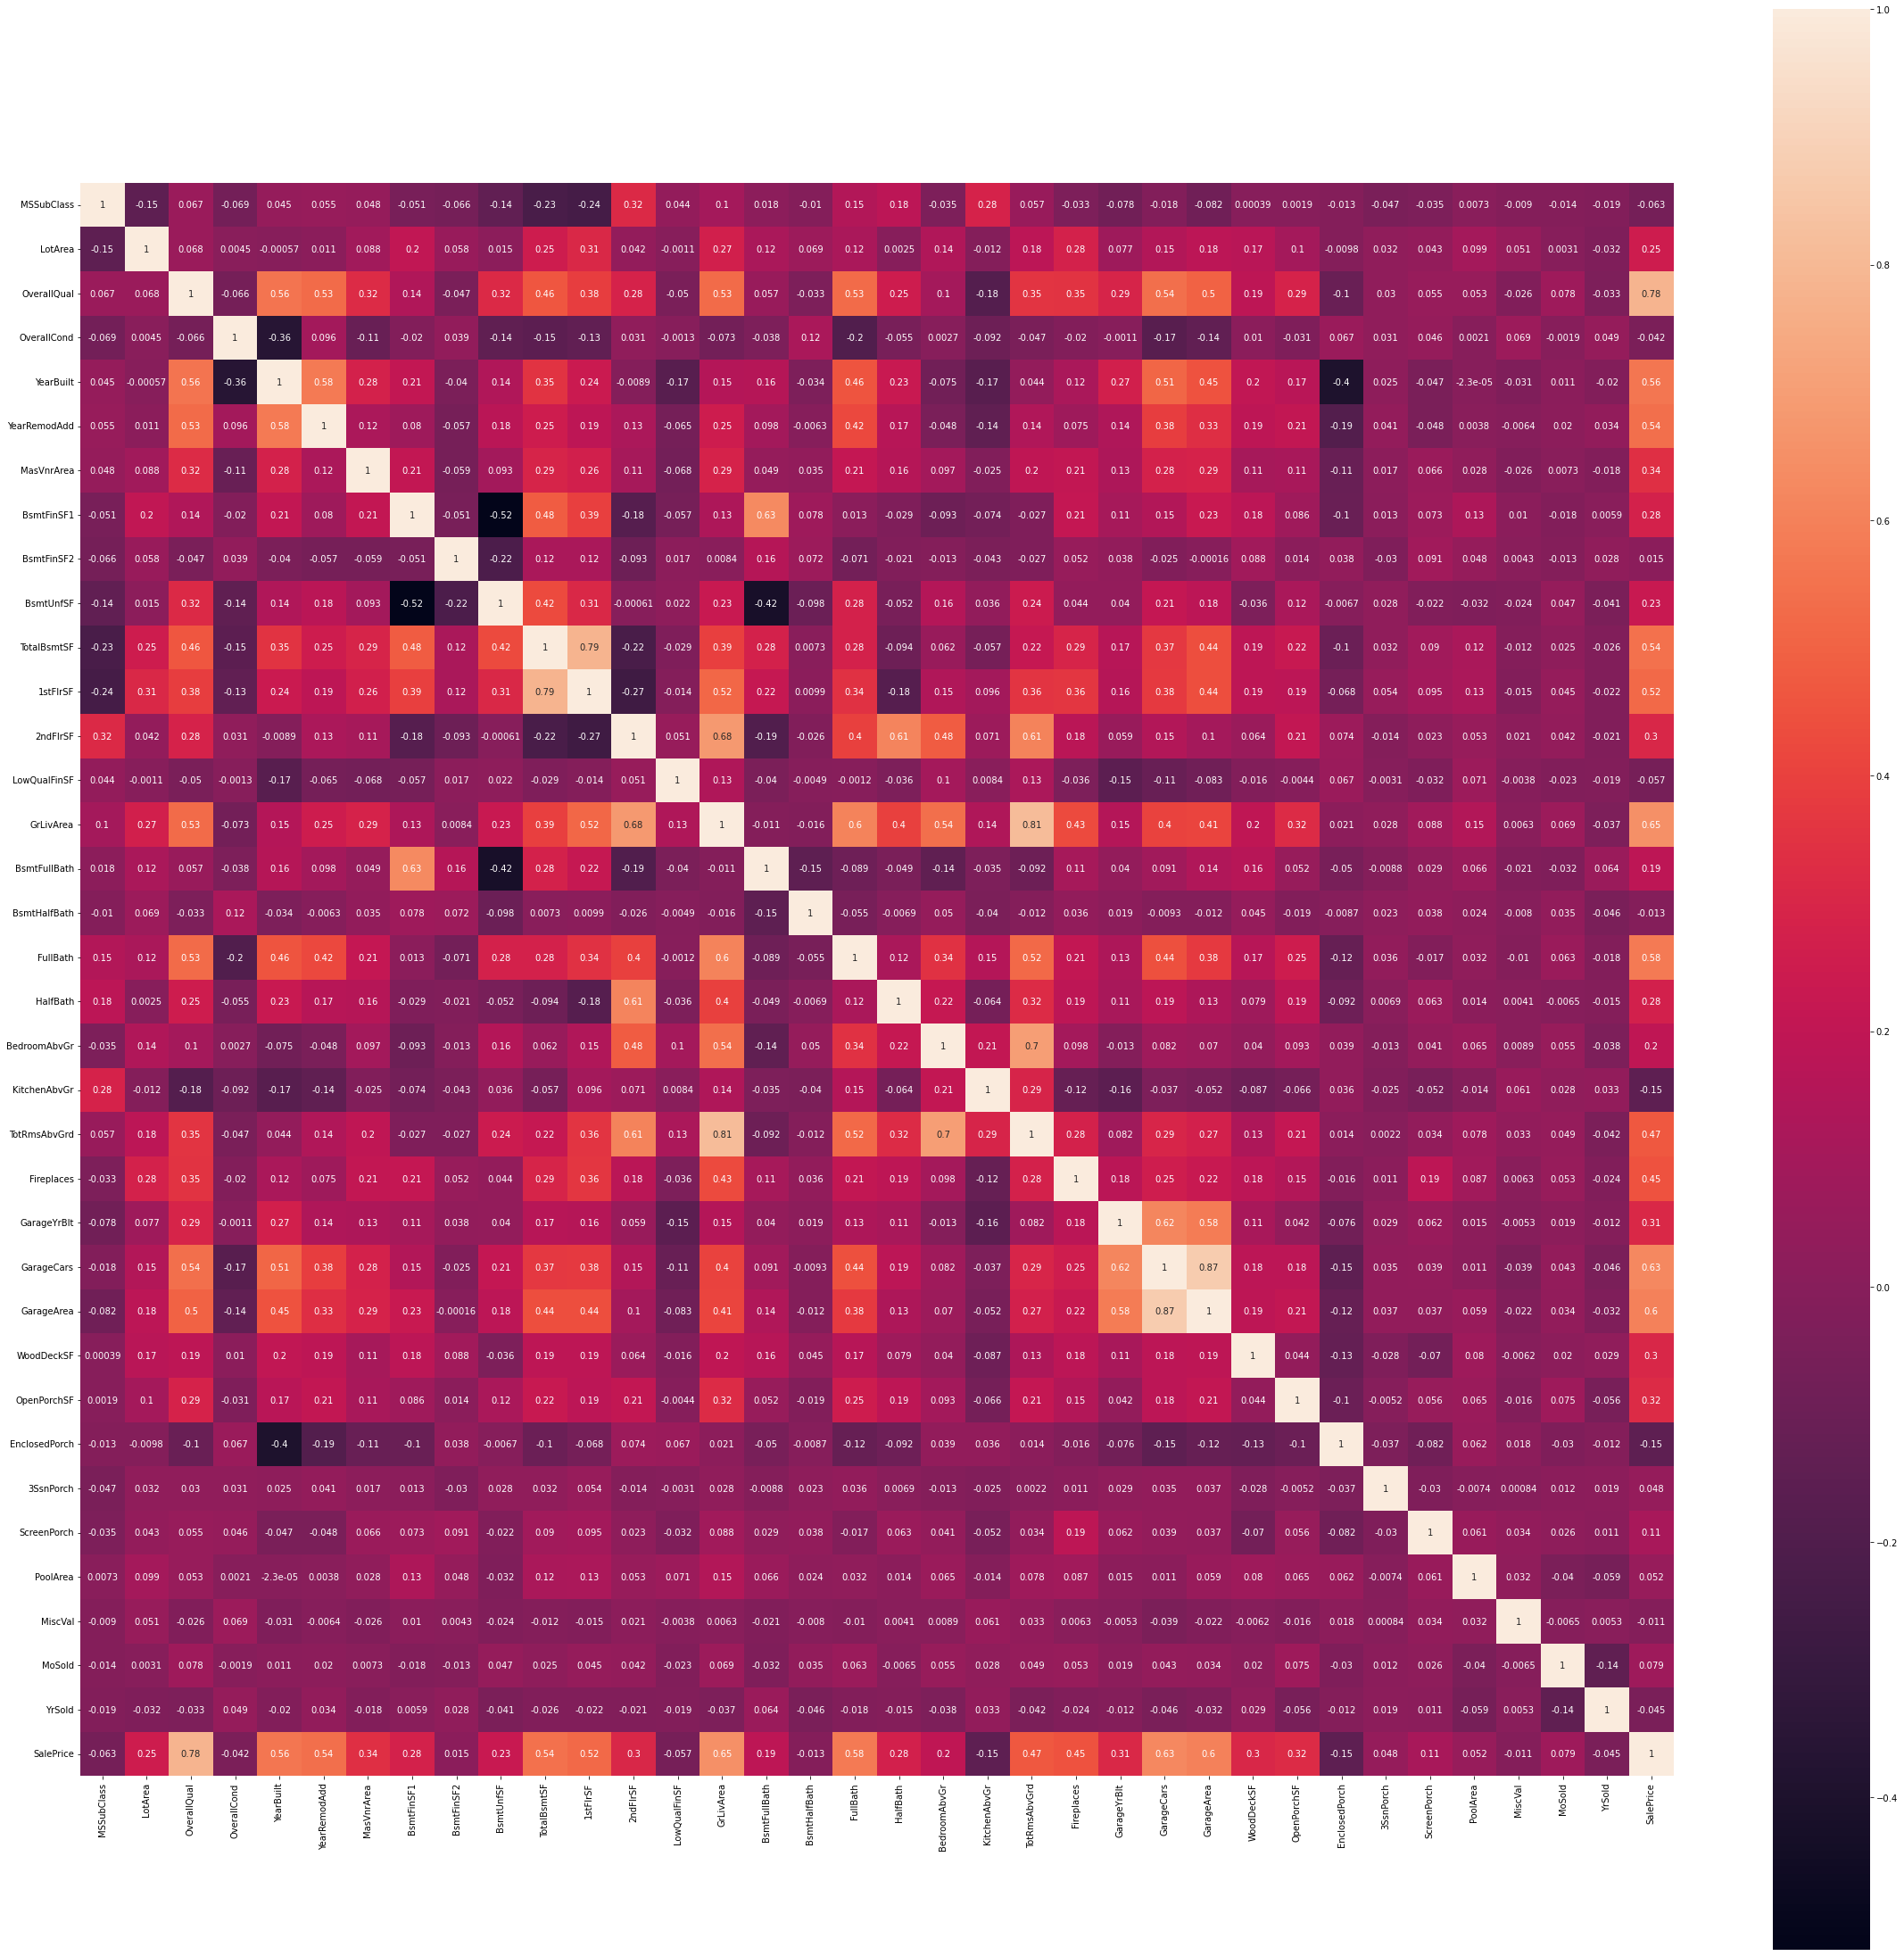

In [24]:
# Lets look at the correlation between variables
plt.figure(figsize=(40,40))
ss.heatmap(housing_data.corr(), square=1.0, annot=True)
plt.show()

## Data Preparation

In [25]:
housing_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [26]:
ordinalList = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond"]
housing_data[ordinalList].astype("category")


Ext_mapper = {"Ex" : 5, "Gd" : 4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
housing_data["ExterQual"] = housing_data["ExterQual"].map(Ext_mapper)
housing_data["ExterCond"] = housing_data["ExterCond"].map(Ext_mapper)

BsmntQual_mapper = {"Ex" : 5, "Gd" : 4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
housing_data["BsmtQual"] = housing_data["BsmtQual"].map(BsmntQual_mapper)

BsmntCond_mapper = {"Ex" : 5, "Gd" : 4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
housing_data["BsmtCond"] = housing_data["BsmtCond"].map(BsmntCond_mapper)

BsmntExp_mapper = {'Gd' : 4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
housing_data["BsmtExposure"] = housing_data["BsmtExposure"].map(BsmntExp_mapper)

BsmntFin_mapper = {'GLQ' : 6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
housing_data["BsmtFinType1"] = housing_data["BsmtFinType1"].map(BsmntFin_mapper)
housing_data["BsmtFinType2"] = housing_data["BsmtFinType2"].map(BsmntFin_mapper)

HeatQual_mapper = {"Ex" : 5, "Gd" : 4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
housing_data["HeatingQC"] = housing_data["HeatingQC"].map(HeatQual_mapper)

KitchenQual_mapper = {"Ex" : 5, "Gd" : 4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
housing_data["KitchenQual"] = housing_data["KitchenQual"].map(KitchenQual_mapper)

FireplaceQual_mapper = {"Ex" : 5, "Gd" : 4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
housing_data["FireplaceQu"] = housing_data["FireplaceQu"].map(FireplaceQual_mapper)

Garage_mapper = {"Ex" : 5, "Gd" : 4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
housing_data["GarageQual"] = housing_data["GarageQual"].map(Garage_mapper)
housing_data["GarageCond"] = housing_data["GarageCond"].map(Garage_mapper)

In [27]:
housing_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [28]:
categorical_data = housing_data.select_dtypes(include="object")
categorical_data.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal


In [29]:
dummies_cat = pd.get_dummies(categorical_data, drop_first=True)
dummies_cat.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0

In [30]:
# Dropping the variables for which the dummies are created
housing_data.drop(categorical_data.columns, axis=1, inplace=True)
housing_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,4,3,4,3,1,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,2003.0,2,548,3,3,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,1976.0,2,460,3,3,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,4,3,4,3,2,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,2001.0,2,608,3,3,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,3,3,3,4,1,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,1998.0,3,642,3,3,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,4,3,4,3,3,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,2000.0,3,836,3,3,192,84,0,0,0,0,0,12,2008,250000


In [31]:
data_df = pd.concat([housing_data, dummies_cat], axis=1)
data_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,4,3,4,3,1,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,2003.0,2,548,3,3,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,1976.0,2,460,3,3,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0

In [32]:
data_df.shape

(1387, 206)

## Splitting the data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
df_train, df_test = train_test_split(data_df, train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(970, 206)
(417, 206)


In [35]:
df_train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.00000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.

In [36]:
df_test.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.00000,417.000000,417.000000,417.00000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.0,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.0,417.000000,417.

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
list_var = ["MSSubClass","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","MasVnrArea","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","HeatingQC","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageYrBlt","GarageCars","GarageArea","GarageQual","GarageCond","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]

#Instantiate the object
scaler = MinMaxScaler()

#Fitting the data
df_train[list_var] = scaler.fit_transform(df_train[list_var])
df_test[list_var] = scaler.transform(df_test[list_var])

In [39]:
# Create X and y for the training dataset
y_train = df_train.pop('SalePrice')
X_train = df_train

In [40]:
y_test = df_test.pop('SalePrice')
X_test = df_test

## Model Building

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [69]:
#Instantiate the object with RFE
lm = LinearRegression()

#Fitting the variables
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)
rfe = rfe.fit(X_train, y_train)

In [70]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea',
       'Condition1_RRNn', 'Condition2_PosN', 'RoofMatl_WdShake',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior2nd_Other',
       'Functional_Maj2', 'Functional_Sev', 'SaleType_Con', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [71]:
X_train_new = X_train[col]
X_train_new.head()

,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,GarageArea,Condition1_RRNn,Condition2_PosN,RoofMatl_WdShake,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior2nd_Other,Functional_Maj2,Functional_Sev,SaleType_Con,SaleType_New,SaleCondition_Partial
837,0.003338,0.555556,0.500,0.737226,0.146018,0.0,0.074927,0.150655,0.053138,0.277228,0.150392,0.250,0.333333,0.189928,0,0,0,0,0,0,0,0,0,0,0
1257,0.024243,0.444444,0.875,0.364964,0.000000,0.0,0.423115,0.269495,0.189016,0.000000,0.122064,0.250,0.333333,0.000000,0,0,0,0,0,0,0,0,0,0,0
601,0.067633,0.555556,0.625,0.474453,0.000000,0.0,0.381978,0.243294,0.159058,0.327283,0.239751,0.375,0.333333,0.391367,0,0,0,0,0,0,0,0,0,0,0
1185,0.074116,0.444444,0.750,0.379562,0.173451,0.0,0.191969,0.244541,0.219330,0.149615,0.204284,0.500,0.333333,0.282014,0,0,0,0,0,0,0,0,0,0,0
568,0.096856,0.777778,0.875,0.810219,0.637611,0.0,0.026934,0.466625,0.414408,0.349835,0.414095,0.125,0.333333,0.440288,0,0,0,0,0,0,0,0,0,0,0


In [72]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [94]:
# After dropping several variables having high p value and high VIF building the model again below
#X_train_new = X_train_new.drop('Exterior1st_CemntBd', axis=1)

In [95]:
#Fitting the linera model
X_train_sm = sm.add_constant(X_train_new)
lr_model = sm.OLS(y_train,X_train_sm).fit()

In [96]:
#Model Summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     384.6
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        15:54:48   Log-Likelihood:                 1219.9
No. Observations:                 970   AIC:                            -2402.
Df Residuals:                     951   BIC:                            -2309.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.26

In [97]:
# vif of model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,OverallQual,40.07
17,SaleCondition_Partial,34.04
16,SaleType_New,34.00
5,TotalBsmtSF,25.78
6,1stFlrSF,22.94
8,BedroomAbvGr,21.08
3,YearBuilt,19.03
9,KitchenAbvGr,15.79
2,OverallCond,15.23
10,GarageArea,9.65


In [98]:
revised_lm = lm.fit(X_train_new, y_train)

print(revised_lm.intercept_)
print(revised_lm.coef_)

-0.26103477704732836
[ 0.38839646  0.37149276  0.16140506  0.20898998  0.1136266   0.21288584
  0.58359625  0.35871704 -0.16409721 -0.17989609  0.143009    0.14590584
 -1.23357058 -0.0931095  -0.33612552  0.14816467  0.16927147 -0.12888501]


In [99]:
X_testt2 = X_test[X_train_new.columns]
X_testt2.head()

,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,GarageArea,Condition1_RRNn,Condition2_PosN,Functional_Maj2,Functional_Sev,SaleType_Con,SaleType_New,SaleCondition_Partial
1265,0.021388,0.666667,0.500,0.927007,0.199115,0.215533,0.135164,0.406491,0.375,0.333333,0.364029,0,0,0,0,0,0,0
895,0.050558,0.555556,0.500,0.664234,0.176991,0.243294,0.231455,0.447195,0.500,0.333333,0.347482,0,0,0,0,0,0,0
1132,0.075539,0.555556,0.375,0.058394,0.000000,0.314410,0.300999,0.567657,0.625,0.333333,0.147482,0,0,0,0,0,0,0
1351,0.069803,0.555556,0.625,0.656934,0.141150,0.267623,0.186876,0.471947,0.500,0.333333,0.352518,0,0,0,0,0,0,0
811,0.027563,0.555556,0.500,0.963504,0.292920,0.264504,0.183310,0.000000,0.125,0.333333,0.302158,0,0,0,0,0,0,0


In [105]:
y_predd_training = lr_model.predict(X_train_sm)
X_testt2_sm = sm.add_constant(X_testt2)
y_predd_test = lr_model.predict(X_testt2_sm)

In [106]:
print(r2_score(y_train, y_predd_training))
print(r2_score(y_test, y_predd_test))

0.8792190825951993
0.5715198294712931


In [107]:
# Calculate R2, RMSE and MSE
metric4 = []
r2_train_lr = r2_score(y_train, y_predd_training)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_predd_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_predd_training))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_predd_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_predd_training)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_predd_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.8792190825951993
0.5715198294712931
4.59091876358987
6.821613193052009
0.004732905941845227
0.016358784635616328


## Linear Regression W/O RFE

In [53]:
#Instantiate the object
lm = LinearRegression()

#Fitting the variables
lm.fit(X_train, y_train)

LinearRegression()

In [54]:
# Checking the coefficient and the slope of the linear without RFE model
print(lm.intercept_)
lm.coef_

-3646043065.842925


array([ 9.06392892e-02,  3.79198038e-01,  2.05915693e-01,  1.42932353e-01,
        1.53886247e-01,  1.52199323e-02,  8.73413658e-02,  9.57761700e-03,
       -5.55788783e-02,  3.78261537e-02, -6.98526760e-02,  2.43142101e-02,
        1.30869740e-02,  4.35759207e+10, -5.21988779e-04,  2.84207554e+10,
        3.93725797e+10, -6.18161070e+10,  1.69763650e-02, -1.14216888e+10,
       -7.40536029e+09, -2.15073170e+09,  1.76865095e+10,  2.66043023e-02,
       -1.22537630e-02,  1.88182045e-03,  2.78126824e-03, -1.03129045e-01,
       -4.58747803e-02,  3.78948091e-02,  1.19787356e-03, -3.97526478e-03,
        2.48548316e-02, -4.56028274e-02,  5.35226606e-02,  9.40279629e-02,
        8.83759378e-02, -2.74094744e-02,  3.64282551e-02,  3.97533588e-02,
        7.43618476e-03,  5.48475861e-02,  4.64135637e-02,  7.67579963e-02,
        6.01012876e-02, -1.79081775e-03, -4.77213970e-03,  1.36511145e-01,
        1.76067203e-01,  1.82502667e-01,  1.35152323e-01,  1.06758252e-03,
        1.51741701e-02,  

In [55]:
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
# Calculate R2 score, RMSE and MSE
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9437997570515684
-2.50782042830975e+18
2.136188028821917
3.992572374692188e+19
0.0022022556998164094
9.574514087990859e+16


## Ridge Regression

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# Cross validation
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid = params,
                        scoring="neg_mean_absolute_error",
                        cv = folds,
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
print(model_cv.best_params_)

{'alpha': 0.2}


In [141]:
alpha = 0.2        #0.4
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 4.11546838e-02  2.84867983e-01  2.04962971e-01  1.35613332e-01
  1.27382402e-01  1.67641055e-02  7.33166378e-02  1.37996076e-02
 -5.25212496e-02  4.55636711e-02 -5.89614401e-02  2.47744558e-02
  1.52294300e-02  1.12449420e-01  1.19432798e-03  4.43313220e-02
  3.23516346e-02  1.20256424e-01  1.73694008e-02  2.35942033e-01
  1.93953113e-01  2.07846546e-02  2.36103758e-01  2.91354289e-02
 -1.64326327e-02  1.13544080e-02  5.49456633e-03 -7.90715776e-02
 -4.03642049e-02  4.30225568e-02  2.12389854e-02  6.50964575e-03
  2.54801094e-02 -4.97924834e-02  5.55155192e-02  9.29562748e-02
  6.95321557e-02 -1.04759696e-02  3.58198251e-02  3.62328586e-02
  1.06182003e-02  5.63928659e-02  4.48022219e-02  8.58863468e-02
  5.27774363e-02 -1.60190633e-03 -5.76390375e-03  8.88693824e-02
  1.22656106e-01  1.36661178e-01  9.33547622e-02  1.71704800e-02
  1.99357112e-02  4.17683124e-02  1.98694086e-03  1.44776908e-02
 -2.38289843e-02 -2.75635949e-03 -8.30193790e-02  1.03399564e-02
 -8.92580905e-03 -2.02544

In [142]:
parameters = list(ridge.coef_)
parameters.insert(0, ridge.intercept_)
parameters = [round(x, 3) for x in parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, parameters))

[('constant', -0.543),
 ('MSSubClass', 0.041),
 ('LotArea', 0.285),
 ('OverallQual', 0.205),
 ('OverallCond', 0.136),
 ('YearBuilt', 0.127),
 ('YearRemodAdd', 0.017),
 ('MasVnrArea', 0.073),
 ('ExterQual', 0.014),
 ('ExterCond', -0.053),
 ('BsmtQual', 0.046),
 ('BsmtCond', -0.059),
 ('BsmtExposure', 0.025),
 ('BsmtFinType1', 0.015),
 ('BsmtFinSF1', 0.112),
 ('BsmtFinType2', 0.001),
 ('BsmtFinSF2', 0.044),
 ('BsmtUnfSF', 0.032),
 ('TotalBsmtSF', 0.12),
 ('HeatingQC', 0.017),
 ('1stFlrSF', 0.236),
 ('2ndFlrSF', 0.194),
 ('LowQualFinSF', 0.021),
 ('GrLivArea', 0.236),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', -0.016),
 ('FullBath', 0.011),
 ('HalfBath', 0.005),
 ('BedroomAbvGr', -0.079),
 ('KitchenAbvGr', -0.04),
 ('KitchenQual', 0.043),
 ('TotRmsAbvGrd', 0.021),
 ('Fireplaces', 0.007),
 ('FireplaceQu', 0.025),
 ('GarageYrBlt', -0.05),
 ('GarageCars', 0.056),
 ('GarageArea', 0.093),
 ('GarageQual', 0.07),
 ('GarageCond', -0.01),
 ('WoodDeckSF', 0.036),
 ('OpenPorchSF', 0.036),
 ('Enclos

In [143]:
coeffs = list(zip(cols, parameters))
coef_df = pd.DataFrame(coeffs)
coef_df.columns = ['Features', 'Coefficients']
coef_df = coef_df.sort_values((['Coefficients']), axis=0, ascending=False)
coef_df.head()

,Features,Coefficients
2,LotArea,0.285
23,GrLivArea,0.236
20,1stFlrSF,0.236
3,OverallQual,0.205
21,2ndFlrSF,0.194


In [144]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9415404816057719
0.6887712001737101
2.2220637636572693
4.954914213026625
0.00229078738521368
0.01188228828063939


## Lasso Regression

In [61]:
from sklearn.linear_model import Lasso

lasso = Lasso()

model_cv2 = GridSearchCV(estimator = lasso,
                         param_grid=params,
                         scoring="neg_mean_absolute_error",
                         cv=folds,
                         return_train_score=True,
                         verbose=1
                        )

model_cv2.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
print(model_cv2.best_params_)

{'alpha': 0.0001}


In [63]:
alpha=0.0001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [64]:
lasso.coef_

array([-3.11492598e-02,  2.62667245e-01,  2.32926271e-01,  1.28033334e-01,
        1.15611651e-01,  2.05605223e-02,  5.50088192e-02,  2.36716224e-02,
       -3.53563299e-02,  3.66160060e-02, -3.41742971e-02,  2.98720420e-02,
        1.45948696e-02,  8.27327078e-02,  6.85301363e-04,  1.16268505e-02,
       -0.00000000e+00,  1.31771859e-01,  1.28273073e-02,  1.66034637e-01,
        1.16153341e-01, -0.00000000e+00,  3.95367440e-01,  2.55061705e-02,
       -1.97228603e-02,  1.68222354e-03,  5.07000447e-03, -4.66703432e-02,
       -4.12784801e-02,  4.45054610e-02,  0.00000000e+00,  0.00000000e+00,
        3.05449242e-02, -0.00000000e+00,  5.23752431e-02,  8.11185759e-02,
        0.00000000e+00,  0.00000000e+00,  3.55077110e-02,  3.43736131e-02,
        2.79529503e-03,  8.26662320e-03,  3.37382019e-02,  4.59176990e-02,
        1.91660576e-02, -0.00000000e+00, -6.40453555e-03,  0.00000000e+00,
        1.46153654e-02,  3.85350124e-02,  3.09710396e-03,  1.82744885e-02,
        8.65956092e-03,  

In [135]:
parameters = list(lasso.coef_)
parameters.insert(0, lasso.intercept_)
parameters = [round(x, 3) for x in parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, parameters))

[('constant', -0.276),
 ('MSSubClass', -0.031),
 ('LotArea', 0.263),
 ('OverallQual', 0.233),
 ('OverallCond', 0.128),
 ('YearBuilt', 0.116),
 ('YearRemodAdd', 0.021),
 ('MasVnrArea', 0.055),
 ('ExterQual', 0.024),
 ('ExterCond', -0.035),
 ('BsmtQual', 0.037),
 ('BsmtCond', -0.034),
 ('BsmtExposure', 0.03),
 ('BsmtFinType1', 0.015),
 ('BsmtFinSF1', 0.083),
 ('BsmtFinType2', 0.001),
 ('BsmtFinSF2', 0.012),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.132),
 ('HeatingQC', 0.013),
 ('1stFlrSF', 0.166),
 ('2ndFlrSF', 0.116),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.395),
 ('BsmtFullBath', 0.026),
 ('BsmtHalfBath', -0.02),
 ('FullBath', 0.002),
 ('HalfBath', 0.005),
 ('BedroomAbvGr', -0.047),
 ('KitchenAbvGr', -0.041),
 ('KitchenQual', 0.045),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.0),
 ('FireplaceQu', 0.031),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.052),
 ('GarageArea', 0.081),
 ('GarageQual', 0.0),
 ('GarageCond', 0.0),
 ('WoodDeckSF', 0.036),
 ('OpenPorchSF', 0.034),
 ('EnclosedPorch',

In [136]:
#Coefficient data
coeffs = list(zip(cols, parameters))
coef_df = pd.DataFrame(coeffs)
coef_df.columns = ['Features', 'Coefficients']
coef_df = coef_df.sort_values((['Coefficients']), axis=0, ascending=False)
coef_df.head()

,Features,Coefficients
23,GrLivArea,0.395
2,LotArea,0.263
3,OverallQual,0.233
20,1stFlrSF,0.166
18,TotalBsmtSF,0.132


In [65]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9343345351351037
0.723913763872481
2.4959639423646367
4.395427467422036
0.0025731587034686977
0.010540593447055243


In [111]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
test = pd.Series(metric4, name = 'LR RFE')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric, test], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,LR RFE
0,R2 Score (Train),9.437998e-01,0.941540,0.934335,0.879219
1,R2 Score (Test),-2.507820e+18,0.688771,0.723914,0.571520
2,RSS (Train),2.136188e+00,2.222064,2.495964,4.590919
3,RSS (Test),3.992572e+19,4.954914,4.395427,6.821613
4,MSE (Train),4.692820e-02,0.047862,0.050726,0.068796
5,MSE (Test),3.094271e+08,0.109006,0.102667,0.127901
